# ANN

## The Perceptron & ANN Architecture

<p style="display: flex">
    <img src="https://images.deepai.org/glossary-terms/perceptron-6168423.jpg" width=450/>
    <img src="https://miro.medium.com/max/639/1*_Epn1FopggsgvwgyDA4o8w.png" width=450/>
</p>

$$\hat{y} = \sigma(X^TW)$$
$$\hat{y} = \sigma(X^TW + bw_0)$$

**Linear & nonlinear operations:**
- Linear: Addition and multiplication
- Nonlinear: Anything else
- Linear models only solve linearly separable problems.
- Nonlinear models can solve more complex problems.
- Never use a linear model for a nonlinear problem, and never use a nonlinear model for a linear problem.

## A Geometric View of ANN:

<p style="display:flex;">
    <img src="./images/image-2.jpeg" width=470 style="border-radius: 10px"/>
    <img src="./images/image-1.jpeg" width=470 style="border-radius: 10px"/>
</p>

| Discrete/categorical/binary/boolean | Numeric/continuous |
| :--: | :--: |
| Pass/fail | Grade (exam score) |
| Text sentiment (positive/negative) | Language translation |
| Race (white, Asian, black) | Attractiveness |

<img src="./images/image-3.jpeg" width=550 style="border-radius: 10px"/>

## Forward Propagation:

<p style="display:flex">
    <img src="https://miro.medium.com/max/394/1*LIIoilXGJLdLpu_oTf_PSw.png" width=450/>
    <img src="https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png" width=500/>
</p>
<p style="display:flex">
    <img src="./images/image-6.png" style="border-radius: 10px" width=450/>
    <img src="./images/image-7.png" style="border-radius: 10px" width=450/>
</p>

## Error, Lost & Cost:

<p style="display:flex">
    <img src="./images/image-8.png" width=450 style="border-radius:10px"/>
    <img src="./images/image-9.png" width=450 style="border-radius:10px"/>
</p>
    
<p style="display:flex">
    <img src="./images/image-10.png" width=450 style="border-radius:10px"/>
    <img src="./images/image-11.png" width=450 style="border-radius:10px"/>
</p>
    
<p style="display:flex">
    <img src="./images/image-12.png" width=450 style="border-radius:10px"/>
</p>
    
## Back Propagation
    
<p style="display:flex">
    <img src="./images/image-13.png" width=450 style="border-radius:10px"/>
    <img src="./images/image-14.png" width=450 style="border-radius:10px"/>
</p>

<p style="display:flex">
    <img src="./images/image-15.png" width=450 style="border-radius:10px"/>
    <img src="./images/image-16.png" width=500 style="border-radius:10px"/>
</p>

## ANN for Regression

<p style="display:flex">
    <img src="./images/image-17.png" width=550 style="border-radius:10px"/>
</p>

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

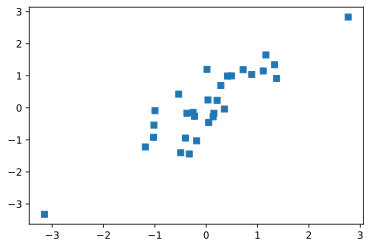

In [2]:
# create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [3]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(in_features=1, out_features=1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(in_features=1, out_features=1)   # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [4]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

In [5]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)


## Train the model!
for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat, y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

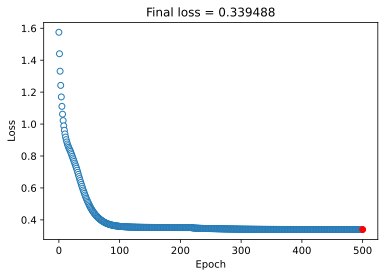

In [6]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [8]:
testloss

tensor(0.3395, grad_fn=<MeanBackward0>)

In [9]:
testloss.item()

0.3394879698753357

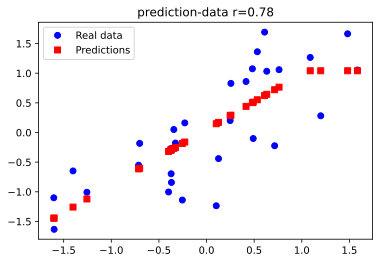

In [10]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
# 
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
# 
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

### Should we use DL for statistics?

**If DL is so great, why don't we all switch to DL models instead of traditional statistical models?**

This is an important and ongoing discussion, but traditional statistical models tent to work better on smaller datasets, are better mathematically characterized (e.g., guaranteed optimal solutions), and are more interpretable. This may change in the future...

### CodeChallenge: Manupulate Regression Slope

**Challenge:**
- Write a python function that builds and trains the model, and outputs the final predictions and losses.
- Write a function that creates the data and outputs x, y. $y = m*x + randn/2.N = 50$
- In a parametric experiment, vary the slope from -2 to +2 in 21 steps. Repeat the entire experiment 50times
- Plot the loss and accuracy (correlation of $\hat{y}, y$) as a function of the slope.

#### A function that creates and trains the model

In [2]:
def buildAndTrainTheModel(x,y):

    # build the model
    ANNreg = nn.Sequential(
      nn.Linear(1,1),  # input layer
      nn.ReLU(),       # activation function
      nn.Linear(1,1)   # output layer
      )

    # loss and optimizer functions
    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=.05)


    #### train the model
    numepochs = 500
    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        # forward pass
        yHat = ANNreg(x)

        # compute loss
        loss = lossfun(yHat,y)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # end training loop


    ### compute model predictions
    predictions = ANNreg(x)


    # output: 
    return predictions, losses

####  A function that creates the data

In [3]:
def createTheData(m):
    N = 50
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2
    return x,y

#### Test it once

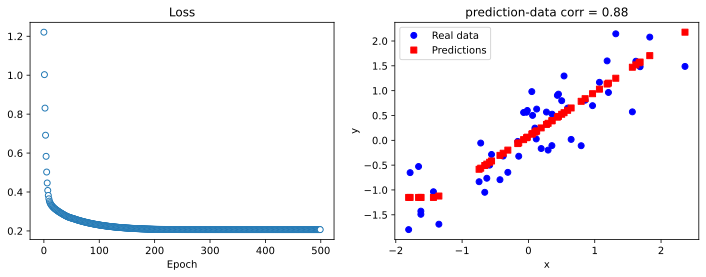

In [11]:
# create a dataset
x,y = createTheData(.8)

# run the model
yHat,losses = buildAndTrainTheModel(x,y)

fig,ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y, 'bo', label='Real data')
ax[1].plot(x, yHat.detach().numpy(), 'rs', label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T, yHat.detach().numpy().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

#### Now for the experiment!

In [15]:
%%time
# (takes 3 mins with 21 slopes and 50 exps)


# the slopes to simulate
slopes = np.linspace(-2,2,21)

numExps = 50

# initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):

    for N in range(numExps):
        # create a dataset and run the model
        x, y = createTheData(slopes[slopei])
        yHat, losses = buildAndTrainTheModel(x, y)

        # store the final loss and performance
        results[slopei, N, 0] = losses[-1]
        results[slopei, N, 1] = np.corrcoef(y.T, yHat.detach().numpy().T)[0,1]


# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

CPU times: total: 2min
Wall time: 2min


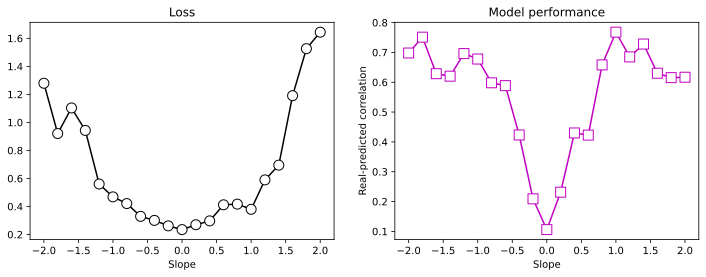

In [16]:
# plot the results!

fig,ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0], axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()

<b style="color:#B916E4">Why were losses larger with larger slopes, even though the fit to the data was better?</b>

Losses are not normalized; they are in the scale of the data. Larger slopes led to more variance in y. **Take-home:** Losses can only be compared on the same data, or on different datasets that are normalized to the same numeric range.

<b style="color:#B916E4">Why did model accuracy drop when the slopes were closer to zero?</b>

x is less informative about y when the slope descreases. The model had less useful information about y.  **Take-home:** ANNs (and DL in general) don't predict data values; they learn relationships across variables (which might be too complex for humans).

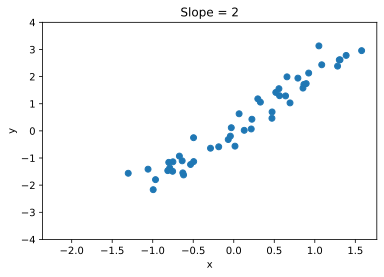

In [18]:
# extra code to visualize data with different slopes

m = 2

x,y = createTheData(m)

plt.title('Slope = ' + str(m))
plt.plot(x, y, 'o')
plt.ylim([-4,4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## ANN for Classification

<p style="display:flex">
    <img src="./images/image-18.png" width=500 style="border-radius:10px"/>
    <img src="./images/image-19.png" width=450 style="border-radius:10px"/>
</p>

<p>
    <img src="./images/image-20.png" width=600 style="border-radius:10px"/>
</p>

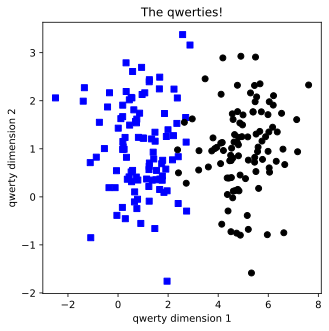

In [19]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [20]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [21]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),   # input layer
    nn.ReLU(),        # activation unit
    nn.Linear(1,1),   # output unit
    nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [22]:
# other model features

learningRate = .01

# loss function
lossfun = nn.BCELoss()  #BinaryClassificationErrorLoss
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer (SGD)
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

In [23]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

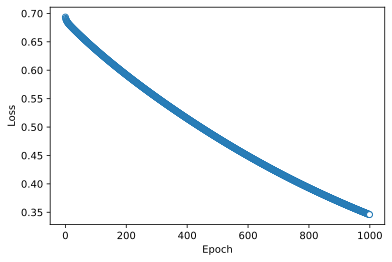

In [24]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [25]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 95.5%


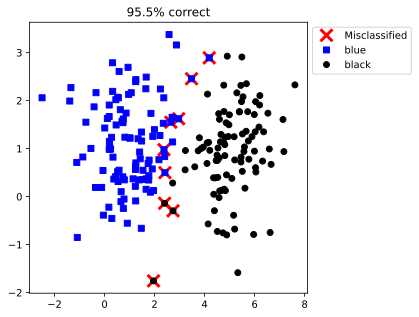

In [26]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

In [ ]:
# 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
#    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
#    until it reaches 90% accuracy.
#    What would happen if the model falls into a local minimum and never reaches 90% accuracy? Yikes! You can
#    force-quit a process in google-colab by clicking on the top-left 'play' button of a code cell.
# 
# 2) It is intuitive that the model can reach 100% accuracy if the qwerties are more separable. Modify the 
#    qwerty-generating code to get the model to have 100% classification accuracy.

## Learning Rates Comparison

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

### Create the Data

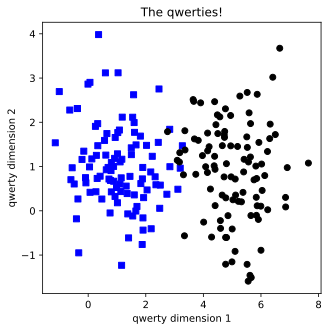

In [2]:
# parameters
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

### Functions to Build and Train the Model

In [3]:
def createANNmodel(learningRate):

    # model architecture
    ANNclassify = nn.Sequential(
      nn.Linear(in_features=2, out_features=1),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(in_features=1, out_features=1),   # output unit
      #nn.Sigmoid(),    # final activation unit (not needed b/c we use BCEWithLogitsLoss)
    )

    # loss function
    lossfun = nn.BCEWithLogitsLoss()

    # optimizer (SGD)
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    # model output
    return ANNclassify, lossfun, optimizer

In [4]:
# a function that trains the model

# a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):

    # initialize losses
    losses = torch.zeros(numepochs)

    # loop over epochs
    for epochi in range(numepochs):
        # forward pass
        yHat = ANNmodel(data)

        # compute loss
        loss = lossfun(yHat,labels)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  
  
  
    # final forward pass
    predictions = ANNmodel(data)
    
    # compute the predictions and report accuracy
    # NOTE: shouldn't it be predictions>.5??
    totalacc = 100 * torch.mean(((predictions>0) == labels).float())
  
    return losses, predictions, totalacc

### Test the New Code by Running it once

Final accuracy: 96%


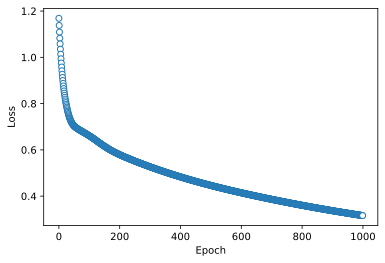

In [5]:
# create everything
ANNclassify, lossfun, optimizer = createANNmodel(.01)

# run it
losses, predictions, totalacc = trainTheModel(ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

### Now For The Experiment

In [6]:
# the set of learning rates to test
learningrates = np.linspace(.001, .1, 40)

# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates), numepochs))


# loop through learning rates
for i,lr in enumerate(learningrates):
  
    # create and run the model
    ANNclassify,lossfun,optimizer = createANNmodel(lr)
    losses,predictions,totalacc   = trainTheModel(ANNclassify)

    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()

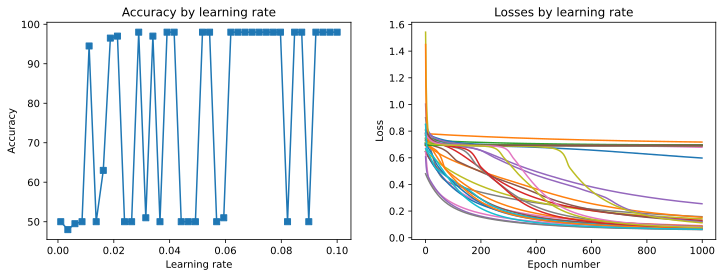

In [7]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [8]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR) > 70)/len(accByLR)

tensor(0.5750)

**From left side graph we can say that sometimes the model got lucky with an initial weight randomization. This means that chance played a large role in our conclusions. New experiment: Repeat the previous experiment 50times and average the results.**

### Run a Meta-Experiment to Get More Reliable Results

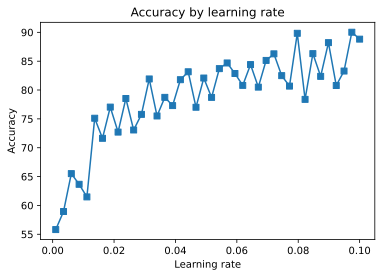

CPU times: total: 4min 14s
Wall time: 4min 15s


In [9]:
%%time
# run a "meta-experiment" by repeating the experiment N times
#  (different random weight initializations each time)
# note: this cell takes ~7 mins.

# number of times to iterate through the experiment
numExps = 50

# matrix to store all results
accMeta = np.zeros((numExps,len(learningrates)))

# fewer epochs to reduce computation time
numepochs = 500

# now for the experiment
for expi in range(numExps):
    for i,lr in enumerate(learningrates):
    
        # create and run the model
        ANNclassify,lossfun,optimizer = createANNmodel(lr)
        losses,predictions,totalacc = trainTheModel(ANNclassify)

        # store the results
        accMeta[expi,i] = totalacc



# now plot the results, averaged over experiments
plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

In [ ]:
# 1) The closeness of the qwerties groups is determined by the XY locations of the centroids, and by the blur parameter.
#    Try increasing or decreasing the blur (e.g., to 2 or .5). How does this affect the number of times that the model
#    successfully learned to categorize the two conditions?
# 
# 2) The mean of a set of numbers is easily interpretable only if the data are roughly normally or uniformly distributed 
#    (see lecture "Mean and variance" in Math section). Do you think the mean is a valid description of the performance
#    of the model's accuracy in the meta-experiment? Use a different metric (e.g., one we discussed in this video!) and 
#    plot that result on the same graph as the average. You might need to do some normalization to get them in the same 
#    range. Does this alternative method lead to a different conclusion?
# 
# 3) Related to the previous comment, perhaps showing an image of the performance (variable accMeta) would be more 
#    appropriate. Create a heat map that shows learning rate on the x-axis, experiment repetitions on the y-axis, and
#    the final accuracy in color. Label the axes and specify suitable color boundaries.

## Multilayer ANN

<p>
    <img src="https://miro.medium.com/max/1400/1*KHs1Chs6TCJDTIIQVyIJxg.png"/>
</p>

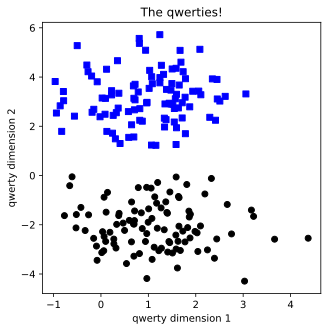

In [10]:
# create data

nPerClust = 100
blur = 1

A = [  1,  3 ]
B = [  1, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

### Functions to build and train the model

In [11]:
def createANNmodel(learningRate):

  # model architecture
    ANNclassify = nn.Sequential(
        nn.Linear(in_features=2, out_features=16),  # input layer
        nn.ReLU(),        # activation unit
        nn.Linear(in_features=16, out_features=1),  # hidden layer
        nn.ReLU(),        # activation unit
        nn.Linear(in_features=1, out_features=1),   # output unit
        nn.Sigmoid(),     # final activation unit
    )

    # loss function
    lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss

    # optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

    # model output
    return ANNclassify,lossfun,optimizer

In [12]:
# a function that trains the model

# a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):

    # initialize losses
    losses = torch.zeros(numepochs)

    # loop over epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNmodel(data)

        # compute loss
        loss = lossfun(yHat,labels)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  
  
  
    # final forward pass
    predictions = ANNmodel(data)
    
    # compute the predictions and report accuracy
    # NOTE: Wasn't this ">0" previously?!?!
    totalacc = 100*torch.mean(((predictions>.5) == labels).float())
  
    return losses, predictions, totalacc

### Test the new code by running it once

Final accuracy: 50%


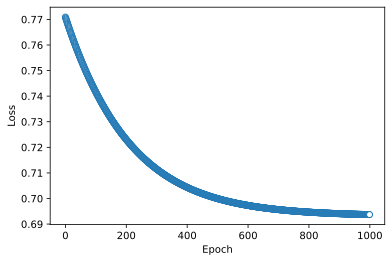

In [13]:
# create everything
ANNclassify, lossfun, optimizer = createANNmodel(.01)

# run it
losses, predictions, totalacc = trainTheModel(ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

### Now for the real test (varying learning rates)

In [14]:
# learning rates
learningrates = np.linspace(.001,.1,50)

# initialize
accByLR   = []
allLosses = np.zeros((len(learningrates), numepochs))


# the loop
for i,lr in enumerate(learningrates):
  
    # create and run the model
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions, totalacc   = trainTheModel(ANNclassify)

    # store the results
    accByLR.append(totalacc)
    allLosses[i, :] = losses.detach()

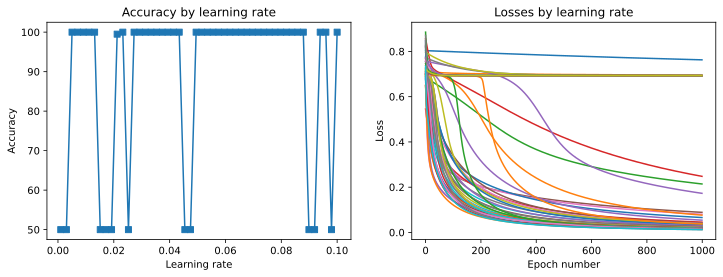

In [19]:
# plot the results
fig,ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

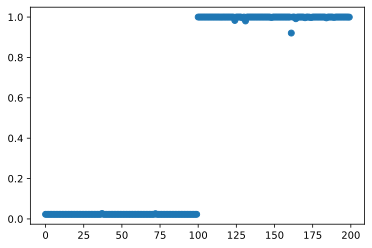

In [24]:
plt.plot(predictions.detach().numpy(), 'o');

In [21]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.7800)

In [ ]:
# 1) The code creates a model with 16 hidden units. Notice where the two "16"s appear when constructing the model. 
#    Recreate the model using 32 hidden units. Does that help with the issue of models getting stuck in local minima?
# 
# 2) Adjust the code to create two hidden layers. The first hidden layer should have 16 hidden units and the second 
#    hidden layer shuold have 32 units. What needs to change in the code to make the numbers match to prevent coding errors?

## Linear Solutions to Linear Problems

**Goal:** Rerun the code file "Part 5 - ANN Multilayer", but remove the nonlinear activation functions from the hidden layers (keep the final output nonlinearity).

**What to look for?** How does linear model performance compare to nonlinear model performance?

**Conclusions:**
- Simple problems require simple solutions
- The classification problem (for our case) are linearly separable, so a linear separator will out-perform a nonlinear separator.
- Nonlinear models (basically all of DL) are best-suited for complex nonlinear problems.
- Appropriate methods for separating our classification problem include a logistic regression and k-means.
- Don't throw a complicated DL model at every problem, just because you can.
- Approach every problem with an open, analytic, creative and critical mind.
- Just because you can doesn't mean you should.

## Why Multiplayer Linear Models Don't Exist

<p style="display:flex;">
    <img src="./images/image-21.png" style="border-radius:10px" width=500/>
    <img src="./images/image-22.png" style="border-radius:10px" width=450/>
</p>

## MultiOutput ANN (Iris Dataset)

<p style="display:flex;">
    <img src="./images/image-23.png" style="border-radius:10px" width=500/>
    <img src="./images/image-24.png" style="border-radius:10px" width=450/>
</p>

### Import and Process the Data

In [25]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

# check out the first few lines of data
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

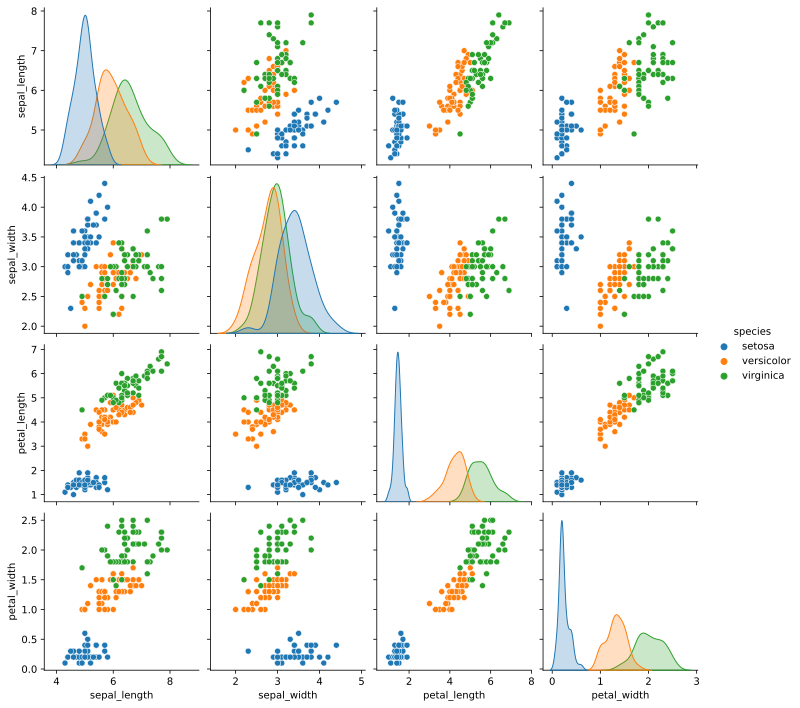

In [26]:
# some plots to show the data
sns.pairplot(iris, hue='species')
plt.show()

In [27]:
# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

### Create the ANN Model

In [28]:
# model architecture
ANNiris = nn.Sequential(
    nn.Linear(in_features=4, out_features=64),   # input layer
    nn.ReLU(),                                   # activation
    nn.Linear(in_features=64, out_features=64),  # hidden layer
    nn.ReLU(),                                   # activation
    nn.Linear(in_features=64, out_features=3),   # output layer
)

# loss function: This loss automatically compute sotfmax
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.01)

### Train the Model

In [29]:
numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

    # forward pass
    yHat = ANNiris(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy
    matches = torch.argmax(yHat, axis=1) == labels # booleans (false/true)
    matchesNumeric = matches.float()                # convert to numbers (0/1)
    accuracyPct = 100 * torch.mean(matchesNumeric)  # average and x100 
    ongoingAcc.append( accuracyPct )                # add to list of accuracies



# final forward pass
predictions = ANNiris(data)
  
predlabels = torch.argmax(predictions, axis=1)
totalacc   = 100*torch.mean((predlabels == labels).float())

In [30]:
torch.argmax(yHat, axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

### Visualize the Results

Final accuracy: 98%


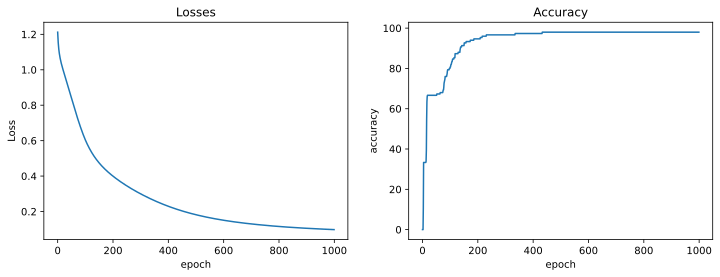

In [32]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [33]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(yHat), axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

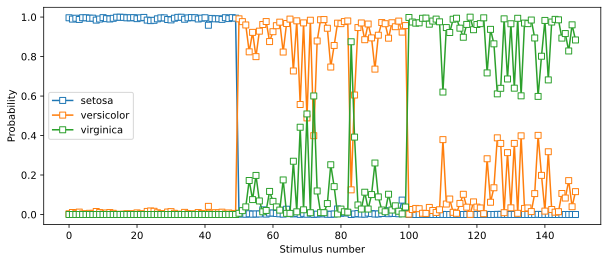

In [35]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

# try it again without the softmax!

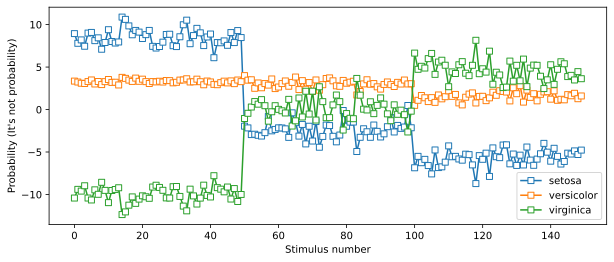

In [38]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(yHat.detach(), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability (It\'s not probability)')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

# try it again without the softmax!

In [ ]:
# 1) When the loss does not reach an asymptote, it's a good idea to train the model for more epochs. Increase the number of
#    epochs until the plot of the losses seems to hit a "floor" (that's a statistical term for being as small as possible).
# 
# 2) We used a model with 64 hidden units. Modify the code to have 16 hidden units. How does this model perform? If there
#    is a decrease in accuracy, is that decrease distributed across all three iris types, or does the model learn some
#    iris types and not others?
# 
# 3) Write code to compute three accuracy scores, one for each iris type. In real DL projects, category-specific accuracies
#    are often more informative than the aggregated accuracy.

### CodeChallenge: MultiClass Classification

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

#### Import and Process the Data

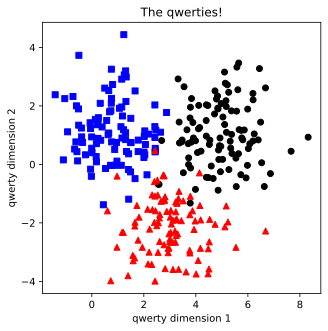

In [2]:
# create data

nPerClust = 100
blur = 1

A = [  1,  1 ]
B = [  5,  1 ]
C = [  3, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

#### Create the ANN Model

In [3]:
# model architecture
ANNq = nn.Sequential(
    nn.Linear(in_features=2, out_features=4),    # input layer
    nn.ReLU(),         # activation unit
    nn.Linear(in_features=4, out_features=3),    # output units
    nn.Softmax(dim=1), # final activation unit (see Additional Exploration #2 for a discussion about this)
      )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNq.parameters(), lr=.01)

In [4]:
# test the model
yHat = ANNq(data)

print(data.shape)
print(yHat.shape)

torch.Size([300, 2])
torch.Size([300, 3])


#### Train the Model

In [5]:
numepochs = 10000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

    # forward pass
    yHat = ANNq(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy
    matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
    matchesNumeric = matches.float()              # convert to numbers (0/1)
    accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
    ongoingAcc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANNq(data)
  
predlabels = torch.argmax(predictions,axis=1)
totalacc   = 100 * torch.mean((predlabels == labels).float())

#### Visualize the Results

Final accuracy: 95%


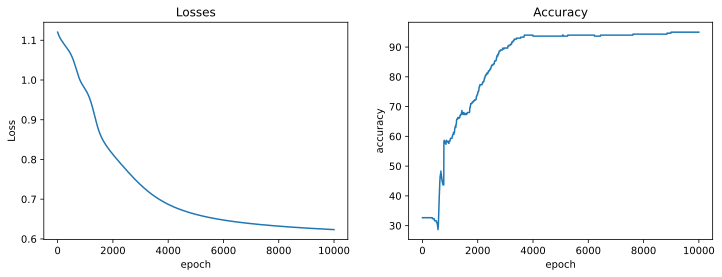

In [7]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

In [8]:
# confirm that all model predictions sum to 1
torch.sum(yHat, axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

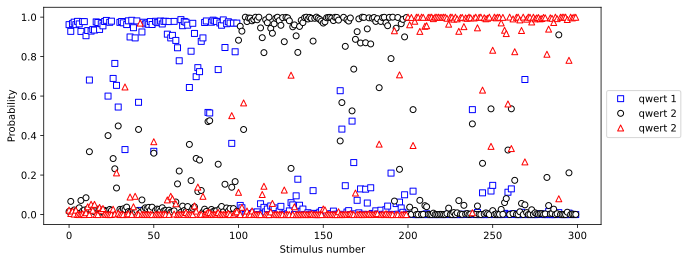

In [9]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

colorshape = [  'bs','ko','r^' ]
for i in range(3):
    plt.plot(yHat[:,i].detach(),colorshape[i],markerfacecolor='w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert 1','qwert 2','qwert 2'],loc=(1.01,.4))
plt.show()

In [ ]:
# 1) Does the model always do well? Re-run the entire notebook multiple times and see if it always reaches high accuracy
#    (e.g., >90%). What do you think would be ways to improve the performance stability of the model?
# 
# 2) You'll learn in the section "Metaparameters" that CrossEntropyLoss computes log-softmax internally. Does that mean 
#    that the Softmax() layer in the model needs to be there? Does it hurt or help? If you remove that final layer, what
#    would change and what would be the same in the rest of the notebook?
#    (Note about this problem: If it feels too advanced, then revisit this problem after the "Metaparameters" section.)

## Comparing the Number of Hidden Units

**Goal:** Classify flowers using a model with one hidden layer, but parametrically change the number of hidden units from 1 to 128. Plot classification accuracy as a function of the model size.

### Import and Organize the Data

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


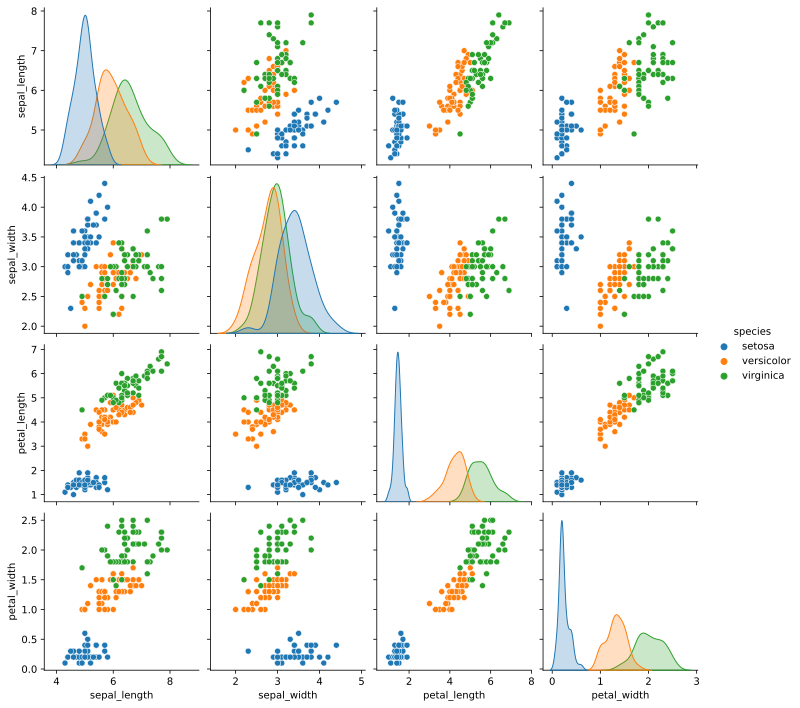

In [2]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')
print( iris.head() )

# some plots to show the data
sns.pairplot(iris, hue='species')
plt.show()

In [3]:
# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

### Function to Create & Train the Model

In [4]:
# Note the input into the function!
def createIrisModel(nHidden):

    # model architecture (with number of units soft-coded!)
    ANNiris = nn.Sequential(
        nn.Linear(in_features=4, out_features=nHidden),       # input layer
        nn.ReLU(),                                            # activation unit
        nn.Linear(in_features=nHidden, out_features=nHidden), # hidden layer
        nn.ReLU(),                                            # activation unit
        nn.Linear(in_features=nHidden, out_features=3),       # output unit
        #nn.Softmax(dim=1),        # final activation unit (here for conceptual purposes, note the CEL function)
    )

    # loss function
    lossfun = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

    return ANNiris,lossfun,optimizer

In [6]:
# a function to train the model

def trainTheModel(ANNiris):

    # loop over epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNiris(data)

        # compute loss
        loss = lossfun(yHat,labels)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    predictions = ANNiris(data)
    
    predlabels = torch.argmax(predictions, axis=1)
    return 100*torch.mean((predlabels == labels).float())

### Run the Experiment

In [7]:
numepochs  = 150
numhiddens = np.arange(1, 129)
accuracies = []

for nunits in numhiddens:

    # create a fresh model instance
    ANNiris,lossfun,optimizer = createIrisModel(nunits)

    # run the model
    acc = trainTheModel(ANNiris)
    accuracies.append( acc )

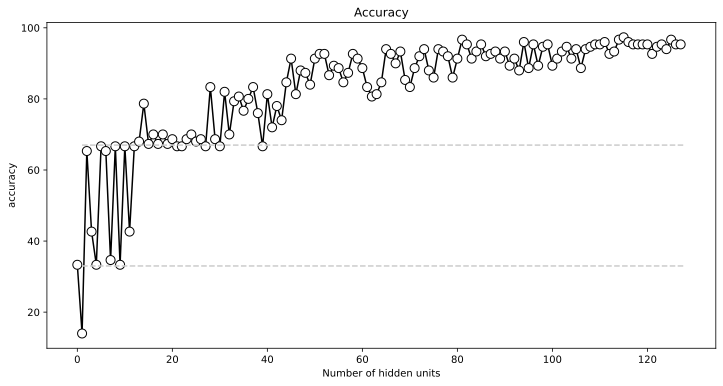

In [8]:
# report accuracy
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(accuracies,'ko-',markerfacecolor='w',markersize=9)
ax.plot(numhiddens[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(numhiddens[[0,-1]],[67,67],'--',color=[.8,.8,.8])
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()

In [ ]:
# 1) The results here show that models with fewer than ~50 hidden units have lackluster performance. Would these models 
#    eventually learn if they were given more training epochs? Try this by re-running the experiment using 500 epochs.
#    Tip: Copy/paste the plotting code into a new cell to keep both plots. Or, take screenshots of the plots.
# 
# 2) Going back to 150 epochs, explore the effect of changing the learning rate. This doesn't need to be a full parametric
#    experiment; you can simply try is again using learning rates of .1, .01 (what we used in the video), and .001.
# 
# 3) With simple models and small datasets, it's possible to test many different parameter settings. However, larger
#    models take longer to train, and so running 128 tests is not always feasible. Modify the code to have the number of
#    hidden units range from 1 to 128 in steps of 14. Plot the results on top of the results using steps of 1 (that is, 
#    show both results in the same graph). Does your interpretation change with fewer experiment runs?

## Depth vs Breadth: Number of Parameters

<p style="display:flex">
    <img src="./images/image-25.png" width=450 style="border-radius:10px"/>
    <img src="./images/image-26.png" width=450 style="border-radius:10px"/>
</p>

In [9]:
# build two models

widenet = nn.Sequential(
    nn.Linear(2,4),  # hidden layer
    nn.Linear(4,3),  # output layer
    )


deepnet = nn.Sequential(
    nn.Linear(2,2),  # hidden layer
    nn.Linear(2,2),  # hidden layer
    nn.Linear(2,3),  # output layer
    )

# print them out to have a look
print(widenet)
print(' ')
print(deepnet)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)
 
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


### Peeking Inside the Network

In [10]:
# check out the parameters
for p in deepnet.named_parameters():
    print(p)
    print(' ')

('0.weight', Parameter containing:
tensor([[-0.5900, -0.6133],
        [-0.6063,  0.0855]], requires_grad=True))
 
('0.bias', Parameter containing:
tensor([-0.4957, -0.6991], requires_grad=True))
 
('1.weight', Parameter containing:
tensor([[-0.1418, -0.5142],
        [ 0.2448,  0.3464]], requires_grad=True))
 
('1.bias', Parameter containing:
tensor([-0.6105,  0.3388], requires_grad=True))
 
('2.weight', Parameter containing:
tensor([[-0.5310,  0.3134],
        [ 0.6634,  0.1353],
        [-0.4746,  0.0745]], requires_grad=True))
 
('2.bias', Parameter containing:
tensor([-0.4167, -0.6781, -0.3938], requires_grad=True))
 


In [11]:
# count the number of nodes ( = the number of biases)

# named_parameters() is an iterable that returns the tuple (name,numbers)
numNodesInWide = 0
for p in widenet.named_parameters():
    if 'bias' in p[0]:
        numNodesInWide += len(p[1])

numNodesInDeep = 0
for paramName,paramVect in deepnet.named_parameters():
    if 'bias' in paramName:
        numNodesInDeep += len(paramVect)


print('There are %s nodes in the wide network.' %numNodesInWide)
print('There are %s nodes in the deep network.' %numNodesInDeep)  

There are 7 nodes in the wide network.
There are 7 nodes in the deep network.


In [12]:
# just the parameters
for p in widenet.parameters():
    print(p)
    print(' ')

Parameter containing:
tensor([[ 0.0421,  0.2590],
        [ 0.1432,  0.5426],
        [ 0.5926, -0.2251],
        [ 0.3883,  0.3899]], requires_grad=True)
 
Parameter containing:
tensor([0.3683, 0.0742, 0.1874, 0.4629], requires_grad=True)
 
Parameter containing:
tensor([[-0.1287, -0.0665,  0.4864,  0.3696],
        [ 0.3022, -0.4120,  0.2846, -0.4497],
        [-0.1190,  0.2798,  0.3111, -0.3875]], requires_grad=True)
 
Parameter containing:
tensor([-0.1560, -0.2065, -0.4339], requires_grad=True)
 


In [13]:
# now count the total number of trainable parameters
nparams = 0
for p in widenet.parameters():
    if p.requires_grad:
        print('This piece has %s parameters' %p.numel())
        nparams += p.numel()

print('\n\nTotal of %s parameters'%nparams)

This piece has 8 parameters
This piece has 4 parameters
This piece has 12 parameters
This piece has 3 parameters


Total of 27 parameters


In [14]:
# btw, can also use list comprehension

nparams = np.sum([ p.numel() for p in widenet.parameters() if p.requires_grad ])
print('Widenet has %s parameters'%nparams)

nparams = np.sum([ p.numel() for p in deepnet.parameters() if p.requires_grad ])
print('Deepnet has %s parameters'%nparams)

Widenet has 27 parameters
Deepnet has 21 parameters


In [18]:
# A nice simple way to print out the model info.
from torchsummary import summary
summary(widenet, (1,2))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1, 4]                12
├─Linear: 1-2                            [-1, 1, 3]                15
Total params: 27
Trainable params: 27
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1, 4]                12
├─Linear: 1-2                            [-1, 1, 3]                15
Total params: 27
Trainable params: 27
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## Defining Models Using `nn.Sequential` vs `class`

<p style="display: flex">
    <img src="./images/image-27.png" width=500 style="border-radius: 10px" />
</p>

In [19]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

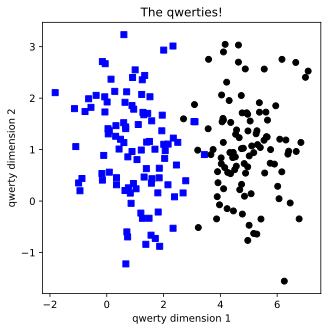

In [20]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [21]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [ ]:
# # build the model
# ANNclassify = nn.Sequential(
#     nn.Linear(2,1),   # input layer
#     nn.ReLU(),        # activation unit
#     nn.Linear(1,1),   # output unit
#     nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
# )

In [22]:
### define the class

class theClass4ANN(nn.Module):
    def __init__(self):
        super().__init__()

        ### input layer
        self.input = nn.Linear(2,1)

        ### output layer
        self.output = nn.Linear(1,1)

    # forward pass
    def forward(self,x):

        # pass through the input layer
        x = self.input(x)

        # apply relu
        x = F.relu( x )

        # output layer
        x = self.output(x)
        x = torch.sigmoid(x)

        return x


### create an instance of the class
ANNclassify = theClass4ANN()

In [24]:
# other model features

learningRate = .01

# loss function
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

In [25]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

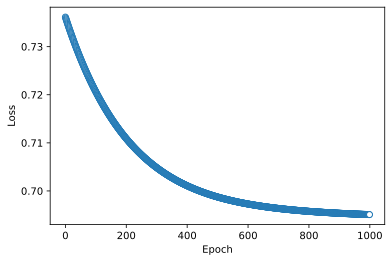

In [26]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [27]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 47.5%


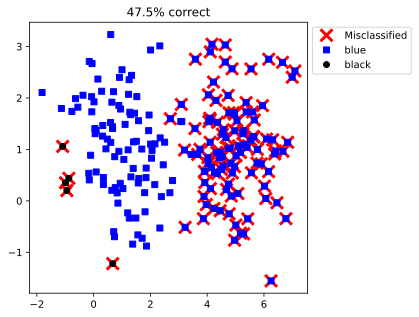

In [28]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

## Model Depth vs Breadth

### Import and Organize the Data

In [29]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [30]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica']  = 2

### Construct and Sanity-Check the Model

In [34]:
# create a class for the model

class ANNiris(nn.Module):
    def __init__(self, nUnits, nLayers):
        super().__init__()

        # create dictionary to store the layers
        self.layers = nn.ModuleDict()
        self.nLayers = nLayers#nUnits#

        ### input layer
        self.layers['input'] = nn.Linear(in_features=4, out_features=nUnits)

        ### hidden layers
        for i in range(nLayers):
            self.layers[f'hidden{i}'] = nn.Linear(in_features=nUnits, out_features=nUnits)

        ### output layer
        self.layers['output'] = nn.Linear(in_features=nUnits, out_features=3)
  

    # forward pass
    def forward(self,x):
        # input layer (note: the code in the video omits the relu after this layer)
        x = F.relu( self.layers['input'](x) )

        # hidden layers
        for i in range(self.nLayers):
            x = F.relu( self.layers[f'hidden{i}'](x) )

        # return output layer
        x = self.layers['output'](x)
        return x

In [35]:
# generate an instance of the model and inspect it
nUnitsPerLayer = 12
nLayers = 4
net = ANNiris(nUnitsPerLayer, nLayers)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [36]:
# A quick test of running some numbers through the model. 
# This simply ensures that the architecture is internally consistent.


# 10 samples, 4 dimensions
tmpx = torch.randn(10, 4)

# run it through the DL
y = net(tmpx)

# exam the shape of the output
print( y.shape ), print(' ')

# and the output itself
print(y)

torch.Size([10, 3])
 
tensor([[-0.1158, -0.1772, -0.2136],
        [-0.1190, -0.1741, -0.2112],
        [-0.1164, -0.1771, -0.2127],
        [-0.1159, -0.1773, -0.2135],
        [-0.1181, -0.1761, -0.2121],
        [-0.1164, -0.1766, -0.2128],
        [-0.1151, -0.1774, -0.2139],
        [-0.1167, -0.1762, -0.2126],
        [-0.1154, -0.1774, -0.2135],
        [-0.1209, -0.1730, -0.2096]], grad_fn=<AddmmBackward0>)


### Create a Function That Trains the Model

In [37]:
# a function to train the model

def trainTheModel(theModel):
  
    # define the loss function and optimizer
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(theModel.parameters(),lr=.01)

    # loop over epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = theModel(data)

        # compute loss
        loss = lossfun(yHat,labels)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

  
  
    # final forward pass to get accuracy
    predictions = theModel(data)
    predlabels = torch.argmax(predictions,axis=1)
    acc = 100*torch.mean((predlabels == labels).float())

    # total number of trainable parameters in the model
    nParams = sum(p.numel() for p in theModel.parameters() if p.requires_grad)

    # function outputs
    return acc, nParams

In [38]:
# test the function once

numepochs = 2500
acc = trainTheModel(net)

# check the outputs 
acc # tuple containing (accuracy, nparams)

(tensor(98.6667), 723)

### Now for the Experiment!

In [39]:
# this cell takes ~2 mins

# define the model parameters
numlayers = range(1,6)         # number of hidden layers
numunits  = np.arange(4,101,3) # units per hidden layer

# initialize output matrices
accuracies  = np.zeros((len(numunits),len(numlayers)))
totalparams = np.zeros((len(numunits),len(numlayers)))

# number of training epochs
numepochs = 500


# start the experiment!
for unitidx in range(len(numunits)):
    for layeridx in range(len(numlayers)):

        # create a fresh model instance
        net = ANNiris(numunits[unitidx],numlayers[layeridx])

        # run the model and store the results
        acc,nParams = trainTheModel(net)
        accuracies[unitidx,layeridx] = acc

        # store the total number of parameters in the model
        totalparams[unitidx,layeridx] = nParams

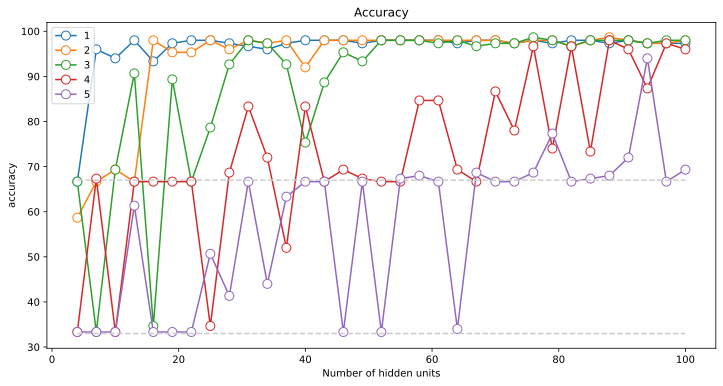

In [40]:
# show accuracy as a function of model depth
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(numunits,accuracies,'o-',markerfacecolor='w',markersize=9)
ax.plot(numunits[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(numunits[[0,-1]],[67,67],'--',color=[.8,.8,.8])
ax.legend(numlayers)
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()

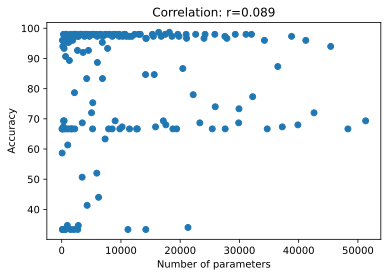

In [41]:
# Maybe it's simply a matter of more parameters -> better performance?

# vectorize for convenience
x = totalparams.flatten()
y = accuracies.flatten()

# correlation between them
r = np.corrcoef(x,y)[0,1]

# scatter plot
plt.plot(x,y,'o')
plt.xlabel('Number of parameters')
plt.ylabel('Accuracy')
plt.title('Correlation: r=' + str(np.round(r,3)))
plt.show()

### What have we learned?

- Deeper models are not necessarily better. They require more training and more FLOPs.
- Model performance is not simply a function of the number of trainable parameters. Architecture matters.
- Shallow models learn fast, but deeper models can learn more complex mappings. (Not demonstrated here).

In [ ]:
# 1) Try it again with 1000 training epochs. Do the deeper models eventually learn?
# 
# 2) The categories are coded a "0", "1", and "2". Is there something special about those numbers?
#    Recode the labels to be, e.g., 5, 10, and 17. Or perhaps -2, 0, and 2. Is the model still able to learn?
# 

### CodeChallenge: Convert nn.Sequential to class

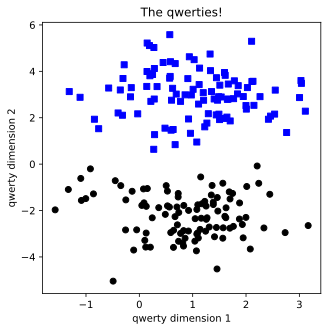

In [42]:
# create data

nPerClust = 100
blur = 1

A = [  1, 3 ]
B = [  1, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

####  Functions to Build and Train the Model

In [ ]:
# def createANNmodel(learningRate):

#   # model architecture
#   ANNclassify = nn.Sequential(
#       nn.Linear(2,16),  # input layer
#       nn.ReLU(),        # activation unit
#       nn.Linear(16,1),  # hidden layer
#       nn.ReLU(),        # activation unit
#       nn.Linear(1,1),   # output unit
#       nn.Sigmoid(),    # final activation unit
#         )

#   # loss function
#   lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss

#   # optimizer
#   optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

#   # model output
#   return ANNclassify,lossfun,optimizer

In [43]:
def createANNmodel(learningRate):

    class ANNiris(nn.Module):
        def __init__(self):
            super().__init__()

            ### input layer
            self.input = nn.Linear(in_features=2, out_features=16)

            ### hidden layer
            self.hidden = nn.Linear(in_features=16, out_features=1)

            ### output layer
            self.output = nn.Linear(in_features=1, out_features=1)
    

        # forward pass
        def forward(self,x):
            # input layer
            x = F.relu( self.input(x) )

            # hidden layer
            x = self.hidden(x)
            x = F.relu(x)
      
            # return output layer
            x = self.output(x)
            x = torch.sigmoid(x)
            return x

    # create the model instance
    ANNclassify = ANNiris()

    # loss function
    lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss

    # optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

    # model output
    return ANNclassify, lossfun, optimizer

In [44]:
# a function that trains the model

# a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):

    # initialize losses
    losses = torch.zeros(numepochs)

    # loop over epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNmodel(data)

        # compute loss
        loss = lossfun(yHat,labels)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  
  
  
    # final forward pass
    predictions = ANNmodel(data)
    
    # compute the predictions and report accuracy
    totalacc = 100*torch.mean(((predictions>.5) == labels).float())
  
    return losses,predictions,totalacc

#### Test the New Code by Running It Once

Final accuracy: 99.5%


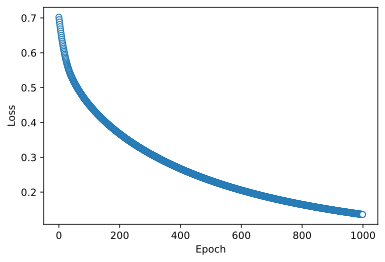

In [45]:
# create everything
ANNclassify,lossfun,optimizer = createANNmodel(.01)

# run it
losses,predictions,totalacc = trainTheModel(ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

#### Now for The Real Test (Varying Learning Rates)

In [46]:
# learning rates
learningrates = np.linspace(.001, .1, 50)

# initialize
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))


# the loop
for i,lr in enumerate(learningrates):
  
    # create and run the model
    ANNclassify,lossfun,optimizer = createANNmodel(lr)
    losses,predictions,totalacc = trainTheModel(ANNclassify)

    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()

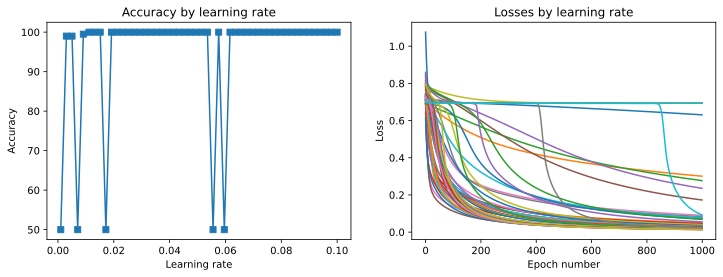

In [48]:
# plot the results
fig,ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [49]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.9000)

## Reflection: Are DL models understandable yet?

**Take-home messages:**
- `The model is simple:` Every node implements an equation so simple we could compute it by hand.
- `The model is complex:` The nonlinearities and interactions across hunfreds of parameters (weights) means that we have no idea what each node is actually encoding.
- `Is it hopeless?` Nope! There are ways to interrogate individual nodes.

**Appropriate applications for DL:**
- DL is best for complex classification tasks, when you don't need to know how the classification works.
- DL is less appropriate for gaining mechanistic insights into how a system behaves, and why.
- Traditional statistical models (e.g., ANOVA or regression) are more appropriate for mechanistic insights into system behavior.